# Import libraries

In [1]:
# Core
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# NLP
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Load the Dataset

In [2]:
df = pd.read_csv("labeled_reddit_data.csv")
df.head()


,subreddit,account_age_years,comment_text,toxicity
0,gaming,2.89,"Yeah, I'm with you. I understand the artistic ...",0
1,gaming,8.70,Okay now do the Gundam Warriors series.,0
2,gaming,0.92,We can close the thread we have the winner answer,0
3,gaming,0.76,For some reason I really miss those dual screens.,0
4,gaming,5.16,"While I agree with you, they just come off as ...",0


# Check Dataset Information

In [3]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subreddit          600 non-null    object 
 1   account_age_years  600 non-null    float64
 2   comment_text       600 non-null    object 
 3   toxicity           600 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 18.9+ KB


,account_age_years,toxicity
count,600.000000,600.00000
mean,6.771683,0.09500
std,4.716467,0.29346
min,0.010000,0.00000
25%,2.297500,0.00000
50%,6.585000,0.00000
75%,10.517500,0.00000
max,17.660000,1.00000


# Split Features and Labels

In [4]:
X = df[['account_age_years', 'subreddit', 'comment_text']]
y = df['toxicity']


# Train/Test Split (80/20)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# BASELINE MODEL — Logistic Regression using ONLY account_age_years
Purpose: Provide a simple benchmark model.
Expected: Very low performance.

# Baseline Pipeline

In [6]:
baseline_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('baseline_lr', LogisticRegression(class_weight='balanced'))
])


# Train baseline model

In [7]:
baseline_pipeline.fit(X_train[['account_age_years']], y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('baseline_lr', LogisticRegression(class_weight='balanced'))])

# Evaluate baseline model

BASELINE MODEL RESULTS
-----------------------
              precision    recall  f1-score   support

           0       0.87      0.54      0.67       109
           1       0.04      0.18      0.06        11

    accuracy                           0.51       120
   macro avg       0.45      0.36      0.37       120
weighted avg       0.79      0.51      0.61       120



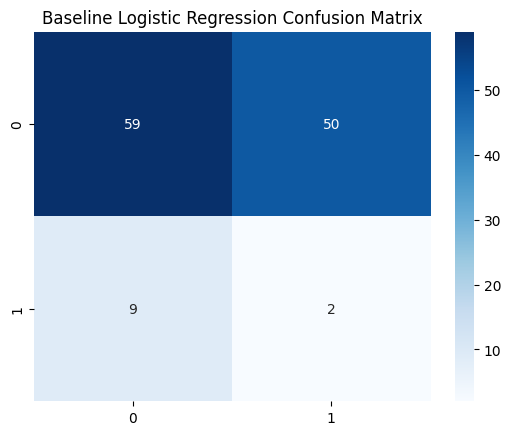

In [8]:
baseline_pred = baseline_pipeline.predict(X_test[['account_age_years']])

print("BASELINE MODEL RESULTS")
print("-----------------------")
print(classification_report(y_test, baseline_pred))

cm = confusion_matrix(y_test, baseline_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Baseline Logistic Regression Confusion Matrix")
plt.show()


# ADVANCED MODEL 1 — Logistic Regression + TF-IDF + OneHotEncoder
This model uses all features:

subreddit (categorical)

account_age_years (numeric)

comment_text (TF-IDF text features)

# preprocessing Pipeline

In [9]:
preprocessor = ColumnTransformer([
    ('subreddit_enc', OneHotEncoder(), ['subreddit']),
    ('age_scaler', StandardScaler(), ['account_age_years']),
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000), 'comment_text')
])


# Full pipeline with Logistic Regression

In [10]:
lr_pipeline = Pipeline([
    ('prep', preprocessor),
    ('lr', LogisticRegression(class_weight='balanced', max_iter=300))
])


# Train Model

In [11]:
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('subreddit_enc',
                                                  OneHotEncoder(),
                                                  ['subreddit']),
                                                 ('age_scaler',
                                                  StandardScaler(),
                                                  ['account_age_years']),
                                                 ('tfidf',
                                                  TfidfVectorizer(max_features=5000,
                                                                  stop_words='english'),
                                                  'comment_text')])),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=300))])

# Evaluate Model

LOGISTIC REGRESSION + TF-IDF RESULTS
------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       109
           1       0.67      0.36      0.47        11

    accuracy                           0.93       120
   macro avg       0.80      0.67      0.72       120
weighted avg       0.91      0.93      0.91       120



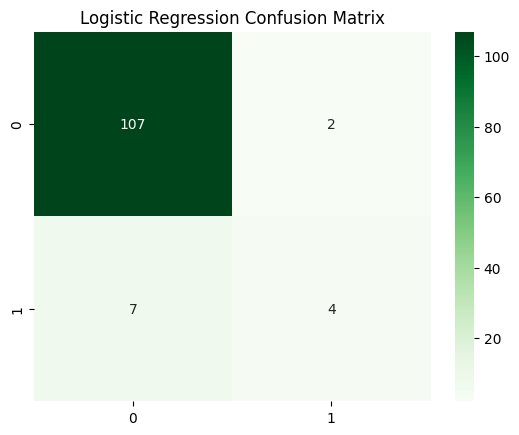

In [12]:
lr_pred = lr_pipeline.predict(X_test)

print("LOGISTIC REGRESSION + TF-IDF RESULTS")
print("------------------------------------")
print(classification_report(y_test, lr_pred))

cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# ADVANCED MODEL 2 — Linear SVM (LinearSVC) + TF-IDF + OneHotEncoder
 This is expected to be your best model.

# SVM Pipeline

In [13]:
svm_pipeline = Pipeline([
    ('prep', preprocessor),
    ('svm', LinearSVC(class_weight='balanced'))
])


# Train SVM

In [14]:
svm_pipeline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('subreddit_enc',
                                                  OneHotEncoder(),
                                                  ['subreddit']),
                                                 ('age_scaler',
                                                  StandardScaler(),
                                                  ['account_age_years']),
                                                 ('tfidf',
                                                  TfidfVectorizer(max_features=5000,
                                                                  stop_words='english'),
                                                  'comment_text')])),
                ('svm', LinearSVC(class_weight='balanced'))])

# Evaluate SVM

LINEAR SVM + TF-IDF RESULTS
-----------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       109
           1       0.60      0.27      0.38        11

    accuracy                           0.92       120
   macro avg       0.77      0.63      0.67       120
weighted avg       0.90      0.92      0.90       120



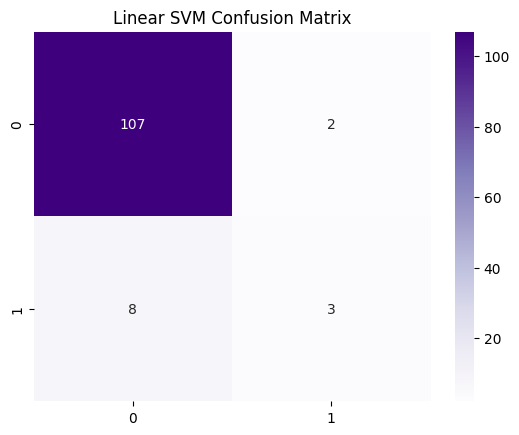

In [15]:
svm_pred = svm_pipeline.predict(X_test)

print("LINEAR SVM + TF-IDF RESULTS")
print("-----------------------------")
print(classification_report(y_test, svm_pred))

cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Linear SVM Confusion Matrix")
plt.show()


# COMPARE ALL MODELS

In [16]:
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

results = pd.DataFrame({
    "Baseline LR": evaluate_model(y_test, baseline_pred),
    "LogReg + TF-IDF": evaluate_model(y_test, lr_pred),
    "SVM + TF-IDF": evaluate_model(y_test, svm_pred)
})

results


,Baseline LR,LogReg + TF-IDF,SVM + TF-IDF
Accuracy,0.508333,0.925000,0.916667
Precision,0.038462,0.666667,0.600000
Recall,0.181818,0.363636,0.272727
F1 Score,0.063492,0.470588,0.375000


# Save Final Model

In [17]:
import joblib
joblib.dump(lr_pipeline, "toxicity_lr_model.pkl")


['toxicity_lr_model.pkl']

# Precision–Recall Curve test (for Logistic Regression + TF-IDF)

additional test to support our claim for the best performing model

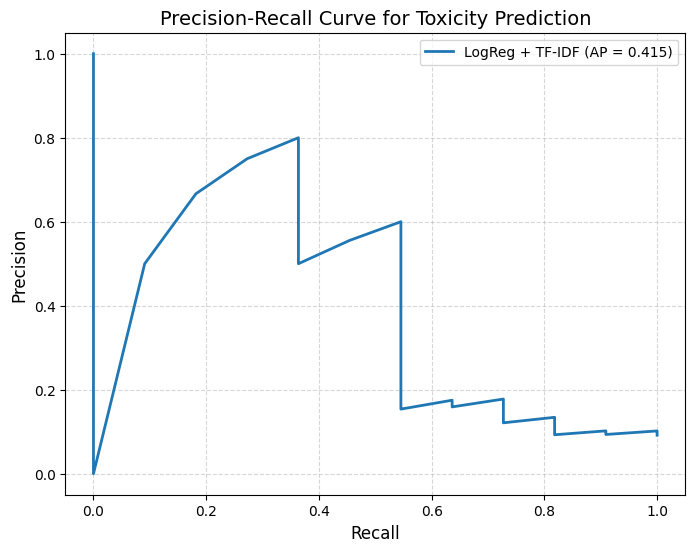

In [18]:
from sklearn.metrics import precision_recall_curve, average_precision_score

#Get prediction probabilities from the model:

# Get predicted probabilities for the positive class (toxic = 1)
lr_probs = lr_pipeline.predict_proba(X_test)[:, 1]

# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, lr_probs)

# Compute average precision score
ap_score = average_precision_score(y_test, lr_probs)

#Plot the Precision–Recall Curve:

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'LogReg + TF-IDF (AP = {ap_score:.3f})', linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve for Toxicity Prediction', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


The Precision–Recall (PR) Curve for the Logistic Regression + TF-IDF model shows that the classifier performs moderately well on the toxic (minority) class despite the strong class imbalance in the dataset. The model achieved an Average Precision (AP) score of 0.415, which is significantly higher than the baseline of 0.10 expected from random guessing. This indicates that the model has learned meaningful patterns related to toxic language.

At low recall levels, the model reaches very high precision (up to 1.0), meaning its toxic predictions are very accurate when it is highly confident. As recall increases into the 0.3–0.4 range, precision remains relatively strong (around 0.7–0.8), showing that the model can identify a reasonable portion of toxic comments without producing too many false positives. Beyond this point, precision drops sharply, which is expected because detecting more toxic comments requires making riskier predictions.

Overall, the PR curve confirms that the model is effective at distinguishing toxic comments under imbalanced conditions and provides a realistic view of the trade-off between precision and recall in toxicity prediction.
